In [1]:
# Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider 

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
'''
The definitions of Rotation Matrices
--------------------------------------------------------------------------------------------------------------------------------------------------------
    - The rotation abt the 1st principle axis (x-axis) is defined by the angle 'psi'
    - The rotation abt the 2nd principle axis (y-axis) is defined by the angle 'theta'
    - The rotation abt the 3rd principle axis (z-axis) is defined by the angle 'phi'
'''

def rotation_matrix_x(phi):
    """Generate rotation matrix for a roll (rotation about the x-axis)"""
    phi = (phi / 180) * np.pi
    c, s = np.cos(phi), np.sin(phi)
    return np.array([[1, 0, 0], 
                     [0, c, -s], 
                     [0, s, c]])

def rotation_matrix_y(theta):
    """Generate rotation matrix for a pitch (rotation about the y-axis)"""
    theta = (theta / 180) * np.pi
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, 0, s], 
                     [0, 1, 0], 
                     [-s, 0, c]])

def rotation_matrix_z(psi):
    """Generate rotation matrix for a yaw (rotation about the z-axis)"""
    psi = (psi / 180) * np.pi
    c, s = np.cos(psi), np.sin(psi)
    return np.array([[c, -s, 0], 
                     [s, c, 0], 
                     [0, 0, 1]])

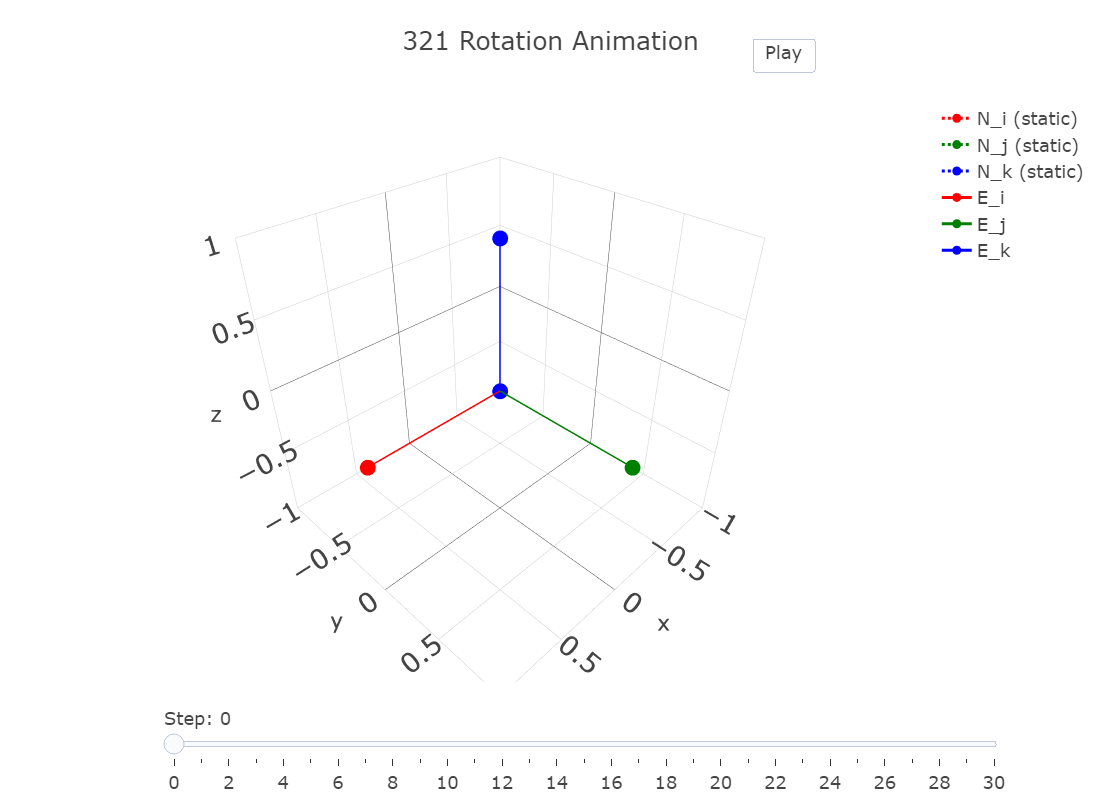

In [6]:
# Initialize the figure
fig = go.Figure()

# Initialize the identity matrix for the N-frame
N_frame = np.eye(3)

# Define a list of tuples containing the vector, its name, and its color for static and initial dynamic display
n_vectors = [(N_frame[:, i], f'N_{chr(105+i)}', color) for i, color in enumerate(['red', 'green', 'blue'])]

# Adding Static N-frame Vectors
for vec, name, color in n_vectors:
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]],
                               mode='lines+markers', name=name + " (static)",
                               marker=dict(color=color), line=dict(dash='dot', color=color)))

# Adding Initial Dynamic E-frame Vectors
for vec, name, color in n_vectors:
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]],
                               mode='lines+markers', name='E' + name[1:],  # Using 'E' prefix
                               marker=dict(color=color), line=dict(dash='solid', color=color)))  # Ensure solid line for dynamic traces

# Animation frames
frames = []
steps = 30
target_theta_x_deg, target_theta_y_deg, target_theta_z_deg = 45, 45, 45
steps_per_rotation = steps // 3

# Animation Frames: Only Update Dynamic E-frame Vectors
for frame in range(steps + 1):
    # Rotation logic here
    # Apply the rotation to the original N-frame basis vectors to get E-frame
    E_frame = np.dot(R, N_frame.T)
    
    # Prepare frame data for the current orientation of the E-frame
    frame_data = [go.Scatter3d(x=[0, E_frame[:, i][0]], y=[0, E_frame[:, i][1]], z=[0, E_frame[:, i][2]],
                               mode='lines+markers', name=f'E_{chr(105+i)}', 
                               marker=dict(color=['red', 'green', 'blue'][i]), line=dict(dash='solid', color=['red', 'green', 'blue'][i])) for i in range(3)]
    frames.append(go.Frame(data=frame_data, name=str(frame)))

# Apply frames to the figure
fig.frames = frames

# Add a slider and play button
fig.update_layout(updatemenus=[dict(type="buttons", 
                                    showactive=False, 
                                    y=1.05, x=0.8, 
                                    xanchor='left', 
                                    yanchor='bottom',
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True, mode='immediate')])])],
                  sliders=[dict(steps=[dict(method='animate', 
                                            args=[[f.name], dict(mode='immediate', frame=dict(duration=100, redraw=True), fromcurrent=True)], label=str(k)) for k, f in enumerate(fig.frames)], 
                                x=0.1, y=0, 
                                currentvalue=dict(visible=True, prefix='Step: '))])

# Set the layout
fig.update_layout(width=1000, 
                  height=800, 
                  template='presentation',
                  scene=dict(aspectmode='cube', 
                             xaxis=dict(range=[-1, 1], autorange=False),
                             yaxis=dict(range=[-1, 1], autorange=False), 
                             zaxis=dict(range=[-1, 1], autorange=False)),
                  title='321 Rotation Animation')

# Show the figure
iplot(fig)